In [1]:
from accelerator import *
import matplotlib.pyplot as plt
import numpy as np

In [95]:
mu = 1.111
sextupole_strength = 2
ring = CustomThin(np.array([[np.cos(mu), np.sin(mu), 0, 0, 0],
                            [-np.sin(mu), np.cos(mu), 0, 0, 0],
                            [0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 1]]))
sextupole = SextupoleThin(sextupole_strength)
lat = Lattice([ring, sextupole])

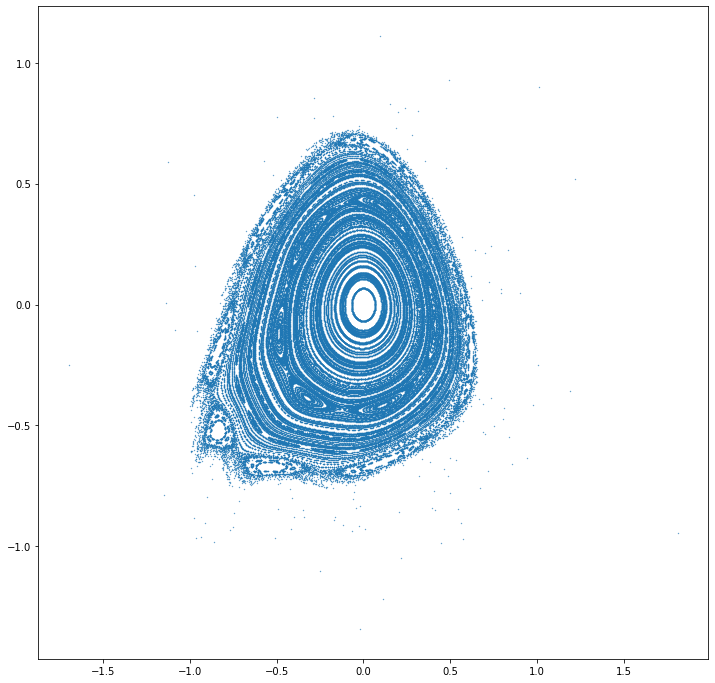

In [97]:
init = Beam(n_particles=200, emittance=0.01, energy=1).match(lat.solve_twiss())
init = np.vstack(init)
outputs = [init]
for i in range(1000):
    _, x, x_prime, y, y_prime, dp  = lat.transport(outputs[-1])
    # keep just the end result
    x = x[:, -1]
    x_prime = x_prime[:, -1]
    y = y[:, -1]
    y_prime = y_prime[:, -1]
    dp = dp[:, -1]
    # get rid of diverged particles
    keep_mask = (abs(x)< 1) & (abs(x_prime) < 1) & (abs(y)< 1) & (abs(y_prime) < 1)
    filler = np.zeros(x_prime.shape)
    outputs.append(np.vstack([x, x_prime, y, y_prime, dp])[:, keep_mask])

outputs = np.hstack(outputs)
x = outputs[0, :]
x_prime = outputs[1, :]
plt.figure(figsize=(12, 12))
plt.scatter(x, x_prime, 0.1)